# Objective: predict if a mushroom is edible or poisonous given the mushrooms.csv dataset.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

import graphviz
from graphviz import Graph

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

# Rename the "class" column to eat_or_die.

In [4]:
df.rename(index=str, columns={'class':'eat_or_die'}, inplace=True)

In [5]:
df.head(40).T

0  1  2  3  4  5  6  7  8  9  ... 30 31 32 33 34 35  \
eat_or_die                p  e  e  p  e  e  e  e  p  e  ...  e  p  e  e  e  e   
cap-shape                 x  x  b  x  x  x  b  b  x  b  ...  b  x  x  x  b  x   
cap-surface               s  s  s  y  s  y  s  y  y  s  ...  s  y  y  y  y  f   
cap-color                 n  y  w  w  g  y  w  w  w  y  ...  y  w  y  n  y  y   
bruises                   t  t  t  t  f  t  t  t  t  t  ...  t  t  t  t  t  t   
odor                      p  a  l  p  n  a  a  l  p  a  ...  l  p  l  l  l  l   
gill-attachment           f  f  f  f  f  f  f  f  f  f  ...  f  f  f  f  f  f   
gill-spacing              c  c  c  c  w  c  c  c  c  c  ...  c  c  c  c  c  w   
gill-size                 n  b  b  n  b  b  b  b  n  b  ...  b  n  b  b  b  n   
gill-color                k  k  n  n  k  n  g  n  p  g  ...  g  k  n  p  n  w   
stalk-shape               e  e  e  e  t  e  e  e  e  e  ...  e  e  e  e  e  t   
stalk-root                e  c  c  e  e  c  c  c  e  c  ...  c  e  c  r  c  b   
stalk-surface-above-ring  s  s  s  s  s  s  s  s  s  s  ...  s  s  s  s  s  s   
stalk-surface-below-ring  s  s  s  s  s  s  s  s  s  s  ...  s  s  s  y  s  s   
stalk-color-above-ring    w  w  w  w  w  w  w  w  w  w  ...  w  w  w  w  w  w   
stalk-color-below-ring    w  w  w  w  w  w  w  w  w  w  ...  w  w  w  w  w  w   
veil-type                 p  p  p  p  p  p  p  p  p  p  ...  p  p  p  p  p  p   
veil-color                w  w  w  w  w  w  w  w  w  w  ...  w  w  w  w  w  w   
ring-number               o  o  o  o  o  o  o  o  o  o  ...  o  o  o  o  o  o   
ring-type                 p  p  p  p  e  p  p  p  p  p  ...  p  p  p  p  p  p   
spore-print-color         k  n  n  k  n  k  k  n  k  k  ...  n  n  n  n  n  n   
population                s  n  n  s  a  n  n  s  v  s  ...  n  s  n  y  s  v   
habitat                   u  g  m  u  g  g  m  m  g  m  ...  m  u  m  p  m  d   

                         36 37 38 39  
eat_or_die                e  p  e  e  
cap-shape                 s  x  x  b  
cap-surface               f  y  f  s  
cap-color                 g  n  y  y  
bruises                   f  t  t  t  
odor                      n  p  a  l  
gill-attachment           f  f  f  f  
gill-spacing              c  c  w  c  
gill-size                 n  n  n  b  
gill-color                k  w  p  k  
stalk-shape               e  e  t  e  
stalk-root                e  e  b  c  
stalk-surface-above-ring  s  s  s  s  
stalk-surface-below-ring  s  s  s  s  
stalk-color-above-ring    w  w  w  w  
stalk-color-below-ring    w  w  w  w  
veil-type                 p  p  p  p  
veil-color                w  w  w  w  
ring-number               o  o  o  o  
ring-type                 p  p  p  p  
spore-print-color         k  n  n  k  
population                v  s  v  s  
habitat                   u  u  d  m  

[23 rows x 40 columns]

In [6]:
df.shape

(8124, 23)

# Check for null values.

In [7]:
df.isnull().sum()

eat_or_die                  0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Consider the columns and their values.

Attribute Information: (classes are renamed eat_or_die: edible=e, poisonous=p)

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises: bruises=t, no=f

odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c, crowded=w, distant=d

gill-size: broad=b, narrow=n

gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r,orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape: enlarging=e, tapering=t

stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type: partial=p, universal=u

veil-color: brown=n, orange=o, white=w, yellow=y

ring-number: none=n, one=o, two=t

ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

# Let's explore the value counts to see which features might be good predictors of whether a mushroom is edible or poisonous.

In [8]:
train, test = train_test_split(df, test_size=.3, random_state=123, stratify=df[['eat_or_die']])

In [9]:
train.shape

(5686, 23)

In [10]:
for column in train.columns:
    print('column = a', column)
    print(train.groupby(column)['eat_or_die'].value_counts())
    print()

column = a eat_or_die
eat_or_die  eat_or_die
e           e             2945
p           p             2741
Name: eat_or_die, dtype: int64

column = a cap-shape
cap-shape  eat_or_die
b          e              299
           p               32
c          p                4
f          e             1134
           p             1095
k          p              412
           e              157
s          e               19
x          e             1336
           p             1198
Name: eat_or_die, dtype: int64

column = a cap-surface
cap-surface  eat_or_die
f            e             1063
             p              539
g            p                3
s            p              981
             e              809
y            p             1218
             e             1073
Name: eat_or_die, dtype: int64

column = a cap-color
cap-color  eat_or_die
b          p              84
           e              34
c          e              20
           p              11
e          p            

# These numbers were from a test/train split that produced 6499 observations in the test set, but I left it as is rather than updating the numbers to match my new split.

# Which attributes that are either all edible or all poisonous?
* Out of 6499

# Odor will be an excellent predictor. Only n is mixed and 97% of them are edible.
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* 'odor' (n, f, s, y, l, a, p, c, m) -- 3699
    * a(almond), l(anise) are all edible (324, 329) = 653
    * c(creosote), f(foul), m(musty), p(pungent), s(spicy), y(fishy) are all poisonous (153, 1732, 30, 200, 470, 461) = 3046
    * n(none) is mixed, but 2713 (97%) are edible

a     e              283
c     p              137
f     p             1533
l     e              261
m     p               19
n     e             2393
      p               80
p     p              183
s     p              390
y     p              407
Name: eat_or_die, dtype: int64



# Gill color may be helpful as an additonal feature as 23% of them are in only one class.
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r,orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* 'gill-color' (b, e, g, h, k, n, o, p, r, u, w, y) -- 1501
    * b (black), r(green) are poisonous (1378) 
    * e(red), o(orange) are edible (73, 50) = 123
    * g, h, k, n, p, u, w, y are mixed

# The rest will be decreasingly helpful, but adding on a few more may increase accuracy a bit.
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* 'ring-type' (e, f, l, n, p) -- 1124
    * f is edible (38)
    * l, n are poisonous (1056, 30) = 1086
    * e, p are mixed 
 
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* 'stalk-color-below-ring' (b, c, e, g, n, o, p, w, y) -- 1087
    * b, c, y are poisonous (346, 30, 21) = 397
    * e, g, o are edible (72, 465, 153) = 690
    * n, p, w are mixed

stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* 'stalk-color-above-ring' (b, c, e, g, n, o, p, w, y) -- 1084
    * b, c, y are poisonous (347, 30, 8) = 385
    * e, g, o are edible (81, 465, 153) = 699
    * n, p, w are mixed


* 'population' (a, c, n, s, v, y) -- 628
    * a, n are edible (305, 323) = 628
    * c, s, v, y are mixed


* 'spore-print-color' (b, h, k, n, o, r, u, w, y) -- 206
    * b, o, u, y are edible (41, 37, 39, 37) = 154
    * r is poisonous (52)
    * h, k, n, w
    

* 'stalk-root' (?, b, c, e, r) -- 162
    * r is edible (162)
    * ?, b, c, e are mixed


* 'veil-color' (n, o, w, y) -- 161
    * n, o are edible (77, 76) = 153
    * y is poisonous (8) 
    * w is mixed


* 'habitat' (d, g, l, m, p, u, w) -- 153
    * w is edible (153)
    * d, g, l, m, p, u are mixed.


* 'cap-shape' (b, c, f, k, s, x) -- 30
    * c are all poisonous (4)
    * s are all edible (26)
    * b, f, k, x are mixed.


* 'ring-number' (n, o, t) -- 30
    * n is poisonous (30)
    * o, t are mixed


* 'cap-color' (b, c, e, g, n, p, r, u, w, y) -- 25
    * r are all edible (13)
    * u are all edible (12)
    * b, c, e, g, n, p, w, y are mixed.


* 'cap-surface' (f, g, s, y) -- 3
    * g are all poisonous (3)
    * f, s, y are mixed.


The following are all mixed, so will be of no use in predicting edible vs poisonous:
* 'bruises' (f, t)
* 'gill-attachment' (a, f)
* 'gill-spacing' (c, w)
* 'gill-size' (b, n)
* 'stalk-shape' (e, t)
* 'stalk-surface-above-ring' (f, k, s, y)
* 'stalk-surface-below-ring' (f, k, s, y)
* 'veil-type' (p)


> Amaretto and Oozo go well with fungi
> 
> Any other smell will bury you,
> 
> Odorless green or white spores and you die
> 
> Eat the rest with your favorite brew

# This seems a good case for a decision tree.

# Encode the values for the decision tree.

In [11]:
df.dtypes

eat_or_die                  object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [12]:
cat_df = pd.DataFrame()
for column in df.columns:
    cat_df[column] = df[column].astype('category')
cat_df.dtypes

eat_or_die                  category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
for column in df.columns:
    cat_df[column] = cat_df[column].cat.codes
cat_df.head()

eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  \
0           1          5            2          4        1     6   
1           0          5            2          9        1     0   
2           0          0            2          8        1     3   
3           1          5            3          8        1     6   
4           0          5            2          3        0     5   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           4  ...   
1                1             0          0           4  ...   
2                1             0          0           5  ...   
3                1             0          1           5  ...   
4                1             1          0           4  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
4                         2                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  2   
1          0           2            1          4                  3   
2          0           2            1          4                  3   
3          0           2            1          4                  2   
4          0           2            1          0                  3   

   population  habitat  
0           3        5  
1           2        1  
2           2        3  
3           3        5  
4           0        1  

[5 rows x 23 columns]

# Note that 1 = poisonous and 0 = edible (alphabetically assigned)

# Now have to split the encoded data.

In [14]:
X = cat_df.drop(['eat_or_die'],axis=1)
y = cat_df[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, stratify = df[['eat_or_die']])

In [15]:
X_train.shape

(5686, 22)

In [16]:
X_test.shape

(2438, 22)

In [17]:
y_train.shape

(5686, 1)

In [18]:
y_test.shape

(2438, 1)

# Confirm that the train has 70% of the data.

In [19]:
X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])

0.6999015263417036

In [20]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [21]:
y_train.columns

Index(['eat_or_die'], dtype='object')

## Create the Decision Tree Object

In [22]:
# for classificaiton you can change the algorithm as gini or entropy (information gain).  
# Default is gini.
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

## Fit the model to the training data

In [23]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

## Estimate poisonous or edible.

In [24]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 1, 1, 1], dtype=int8)

## Estimate the probability of a mushroom being poisonous.

In [25]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.97297297, 0.02702703],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.33529412, 0.66470588],
       [0.33529412, 0.66470588],
       [0.97297297, 0.02702703]])

# Evaluate the Model.
## Compute the accuracy (number of correct predictions over the number of total instances that have been evaluated).

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


## 96% accuracy is great!

### Create a confusion matrix
- True Positive: number of occurrences where y is true and y is predicted true.
- True Negative: number of occurrences where y is false and y is predicted false.
- False Positive: number of occurrences where y is false and y is predicted true.
- False Negative: number of occurrences where y is true and y is predicted false.

In [27]:
confusion_matrix(y_train, y_pred)

array([[2774,  171],
       [  75, 2666]])

In [28]:
# labels = sorted(y_train.eat_or_die.unique())
# pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

cm

Pred -  Pred +
Actual -    2774     171
Actual +      75    2666

In other words...

In [29]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)

true negatives:  2774
true positives:  2666
false positives (not as bad):  171
false negatives (really bad to miss identifying a mushroom as being poisonous):  75


## This looks really good with very few false positives or--especially--false negatives. But it's still saying 75 poisonous mushrooms are edible. Is that good enough?

### Create a classificaiton report
- Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- Support: number of occurrences of each class in where y is true.

In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2945
           1       0.94      0.97      0.96      2741

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686



## 97% on negative precision is great, but 94% on positive precision is perhaps concerning if I'm eating the mushrooms.

# Test Model
## Compute the accuracy of the model when run on the test data

In [31]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.96


## The model performed just as good on the test data as it did on the training data. Normally excellent! Good enough considering the impact of false negatives? 

# Visualize Model 

In [32]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('mushroom_decision_tree', view=True)

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'mushroom_decision_tree'], make sure the Graphviz executables are on your systems' PATH

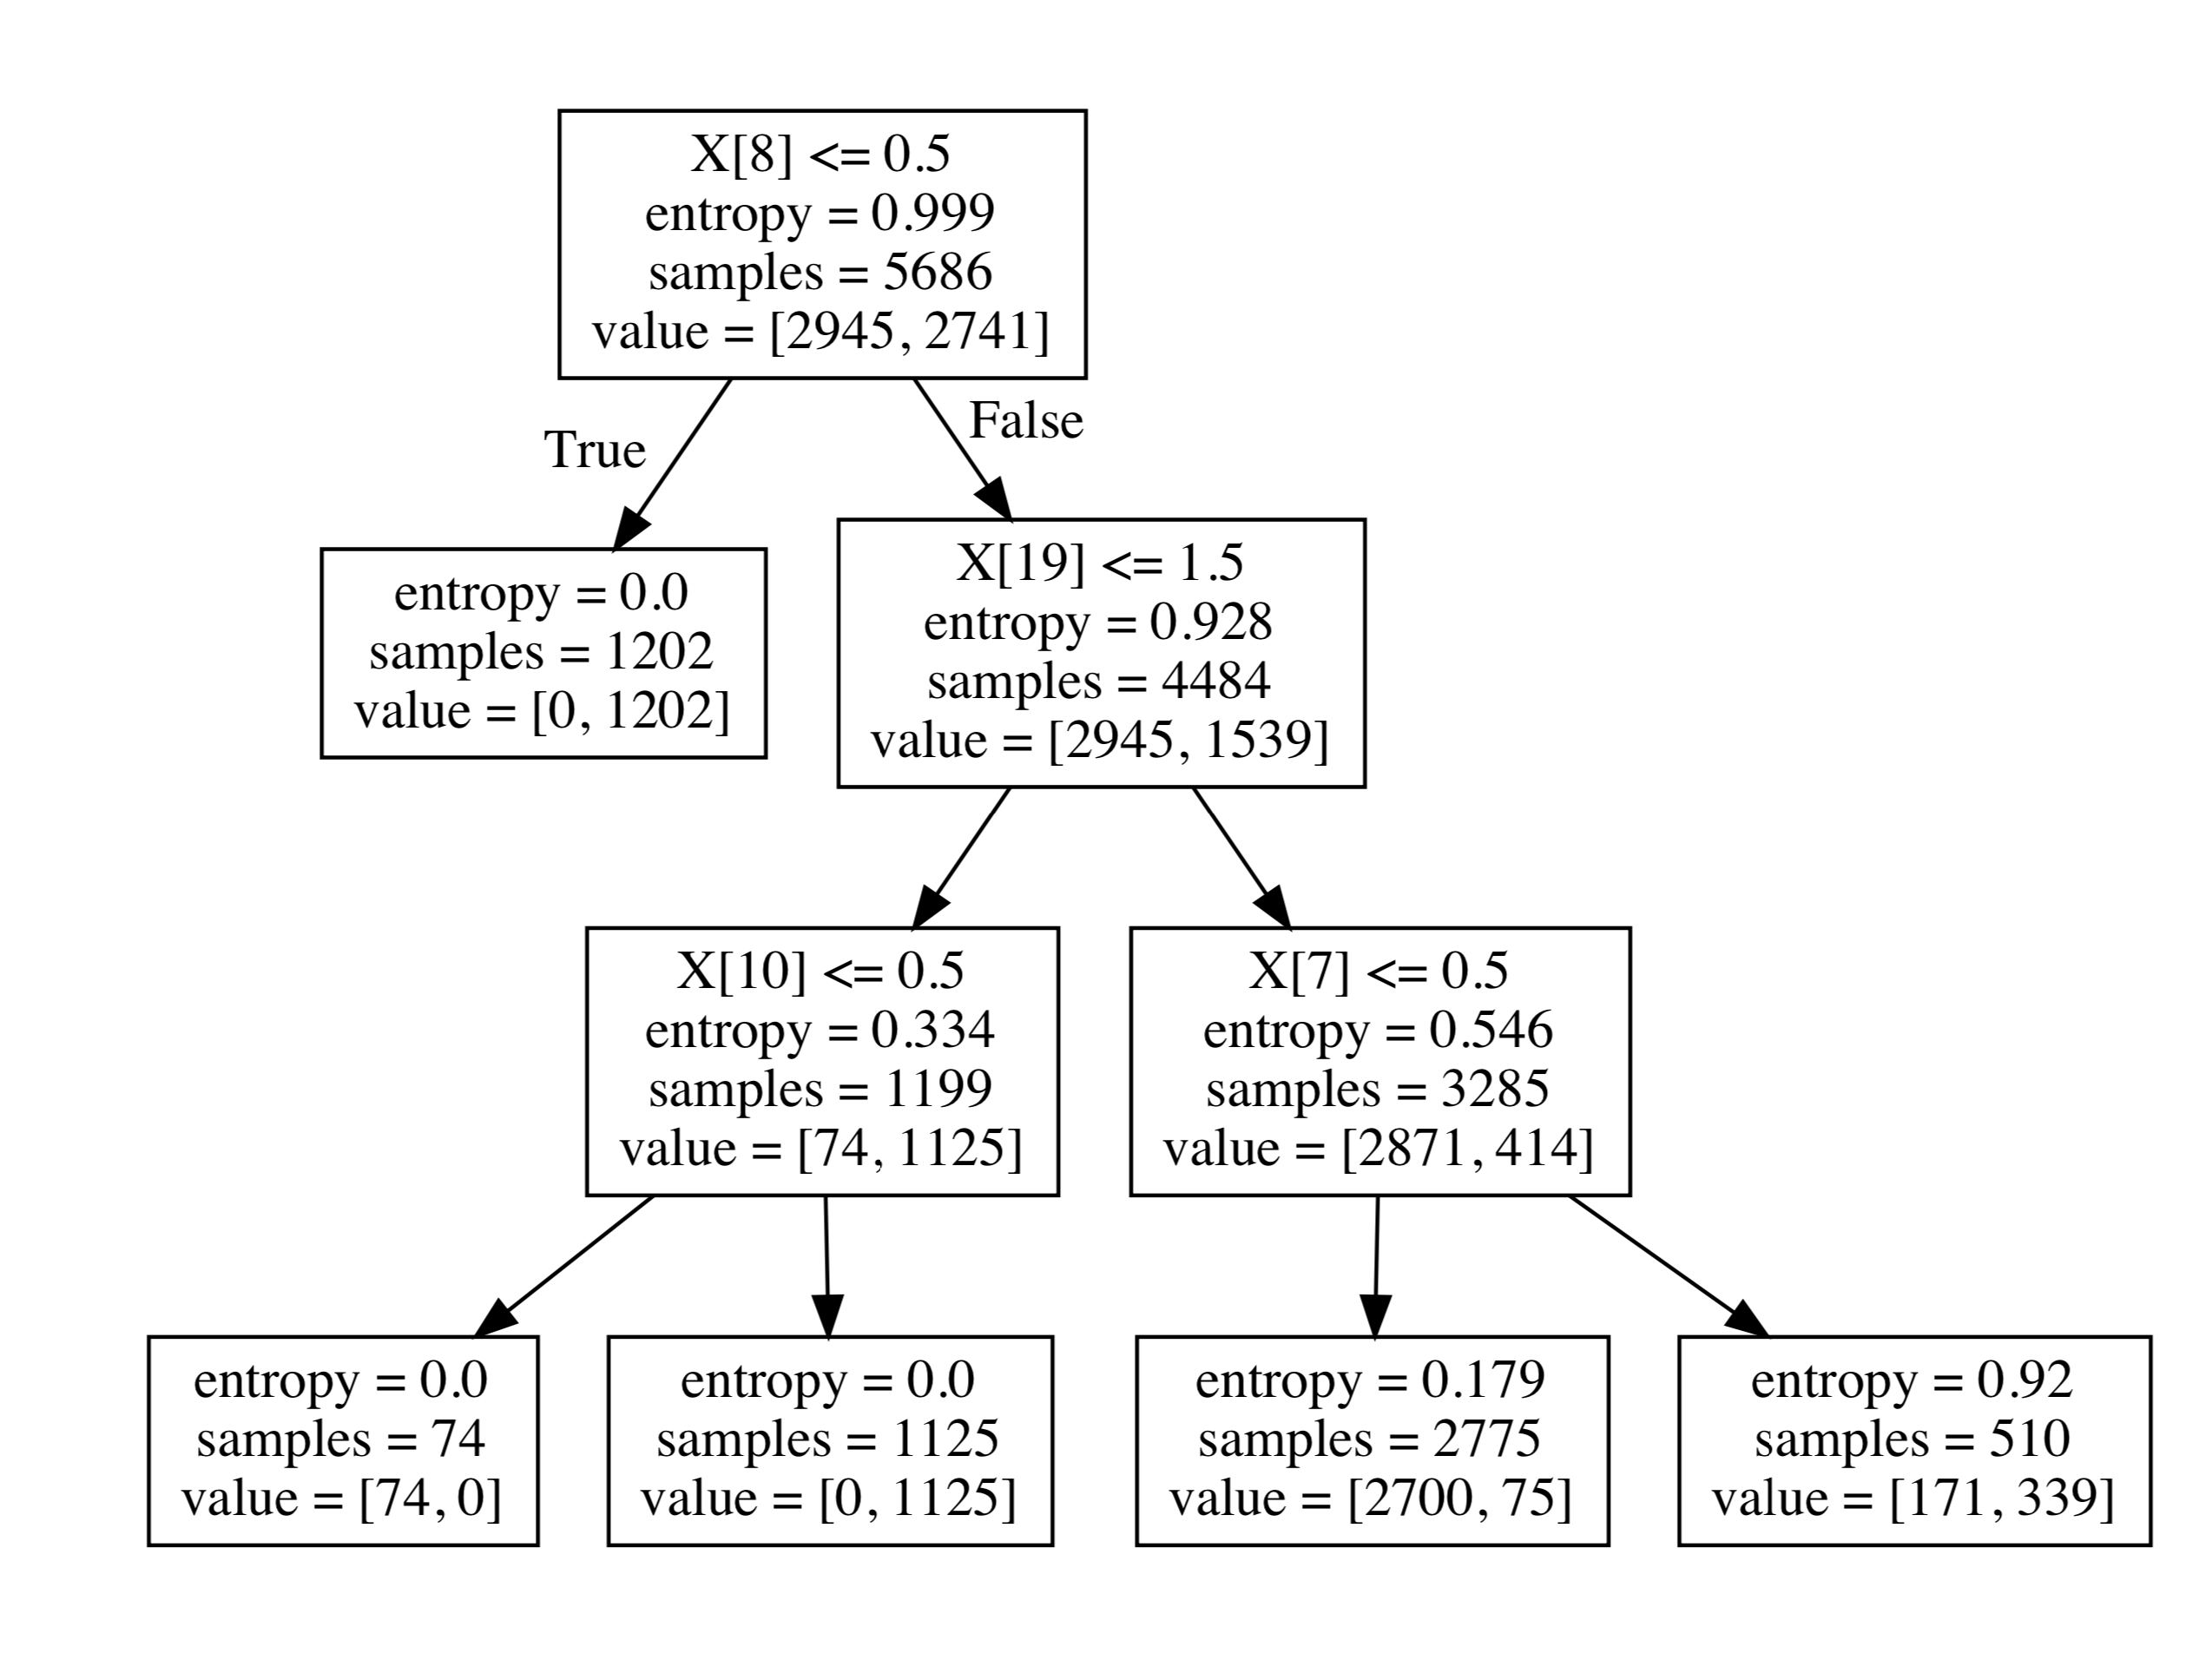

# Let's try separating the dataframe into two dataframes with one having mushrooms that have no smell and one having mushrooms that do have a smell.

In [34]:
df.odor.sort_values().unique()

array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object)

In [35]:
cat_df.odor.sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
df[df.odor == 'n'].head()

eat_or_die cap-shape cap-surface cap-color bruises odor gill-attachment  \
4           e         x           s         g       f    n               f   
14          e         x           f         n       f    n               f   
15          e         s           f         g       f    n               f   
16          e         f           f         w       f    n               f   
28          e         f           f         n       f    n               f   

   gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
4             w         b          k  ...                        s   
14            w         b          n  ...                        f   
15            c         n          k  ...                        s   
16            w         b          k  ...                        s   
28            c         n          k  ...                        s   

   stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
4                       w                      w         p          w   
14                      w                      w         p          w   
15                      w                      w         p          w   
16                      w                      w         p          w   
28                      w                      w         p          w   

   ring-number ring-type spore-print-color population habitat  
4            o         e                 n          a       g  
14           o         e                 k          a       g  
15           o         p                 n          y       u  
16           o         e                 n          a       g  
28           o         p                 k          y       u  

[5 rows x 23 columns]

In [37]:
cat_df[cat_df.odor == 5].head()

eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  \
4            0          5            2          3        0     5   
14           0          5            0          4        0     5   
15           0          4            0          3        0     5   
16           0          2            0          8        0     5   
28           0          2            0          4        0     5   

    gill-attachment  gill-spacing  gill-size  gill-color  ...  \
4                 1             1          0           4  ...   
14                1             1          0           5  ...   
15                1             0          1           4  ...   
16                1             1          0           4  ...   
28                1             0          1           4  ...   

    stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
4                          2                       7                       7   
14                         0                       7                       7   
15                         2                       7                       7   
16                         2                       7                       7   
28                         2                       7                       7   

    veil-type  veil-color  ring-number  ring-type  spore-print-color  \
4           0           2            1          0                  3   
14          0           2            1          0                  2   
15          0           2            1          4                  3   
16          0           2            1          0                  3   
28          0           2            1          4                  2   

    population  habitat  
4            0        1  
14           0        1  
15           5        5  
16           0        1  
28           5        5  

[5 rows x 23 columns]

# So no odor has indeed been encoded to a 5. Split the dataframes.

In [38]:
no_odor = cat_df[cat_df.odor == 5]
no_odor.head()

eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  \
4            0          5            2          3        0     5   
14           0          5            0          4        0     5   
15           0          4            0          3        0     5   
16           0          2            0          8        0     5   
28           0          2            0          4        0     5   

    gill-attachment  gill-spacing  gill-size  gill-color  ...  \
4                 1             1          0           4  ...   
14                1             1          0           5  ...   
15                1             0          1           4  ...   
16                1             1          0           4  ...   
28                1             0          1           4  ...   

    stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
4                          2                       7                       7   
14                         0                       7                       7   
15                         2                       7                       7   
16                         2                       7                       7   
28                         2                       7                       7   

    veil-type  veil-color  ring-number  ring-type  spore-print-color  \
4           0           2            1          0                  3   
14          0           2            1          0                  2   
15          0           2            1          4                  3   
16          0           2            1          0                  3   
28          0           2            1          4                  2   

    population  habitat  
4            0        1  
14           0        1  
15           5        5  
16           0        1  
28           5        5  

[5 rows x 23 columns]

In [39]:
odor = cat_df[cat_df.odor != 5]
odor.head()

eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  \
0           1          5            2          4        1     6   
1           0          5            2          9        1     0   
2           0          0            2          8        1     3   
3           1          5            3          8        1     6   
5           0          5            3          9        1     0   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           4  ...   
1                1             0          0           4  ...   
2                1             0          0           5  ...   
3                1             0          1           5  ...   
5                1             0          0           5  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                       7                       7   
2                         2                       7                       7   
3                         2                       7                       7   
5                         2                       7                       7   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0          0           2            1          4                  2   
1          0           2            1          4                  3   
2          0           2            1          4                  3   
3          0           2            1          4                  2   
5          0           2            1          4                  2   

   population  habitat  
0           3        5  
1           2        1  
2           2        3  
3           3        5  
5           2        1  

[5 rows x 23 columns]

# Train and test model on only mushrooms with no odor.

In [40]:
X = no_odor.drop(['eat_or_die'],axis=1)
y = no_odor[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = no_odor[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99

          Pred -  Pred +
Actual -    2385       0
Actual +      33      51

true negatives:  2385
true positives:  51
false positives (not as bad):  0
false negatives (really bad to miss identifying a mushroom as being poisonous):  33

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2385
           1       1.00      0.61      0.76        84

    accuracy                           0.99      2469
   macro avg       0.99      0.80      0.87      2469
weighted avg       0.99      0.99      0.99      2469

Accuracy of Decision Tree classifier on test set: 0.99


In [41]:
X = odor.drop(['eat_or_die'],axis=1)
y = odor[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = odor[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

y_pred_proba = clf.predict_proba(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00

          Pred -  Pred +
Actual -     560       0
Actual +       0    2657

true negatives:  560
true positives:  2657
false positives (not as bad):  0
false negatives (really bad to miss identifying a mushroom as being poisonous):  0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00      2657

    accuracy                           1.00      3217
   macro avg       1.00      1.00      1.00      3217
weighted avg       1.00      1.00      1.00      3217

Accuracy of Decision Tree classifier on test set: 1.00


# Much better! Dropped from 75 poisonous mushrooms being labeled as edible to only 33. Is that good enough? Is there something else I can do to catch the poisonous mushrooms with no odor?

# Let's look at the gill colors of the mushrooms with no odor.

In [42]:
die_no_odor = no_odor[['odor', 'gill-color', 'eat_or_die']][no_odor.eat_or_die == 1]
die_no_odor.head()

odor  gill-color  eat_or_die
4106     5           2           1
4331     5          10           1
4364     5          10           1
4494     5          10           1
4549     5           2           1

In [43]:
die_no_odor.groupby('gill-color')['eat_or_die'].value_counts()

gill-color  eat_or_die
2           1             24
8           1             24
10          1             68
11          1              4
Name: eat_or_die, dtype: int64

gill-color: 0-black=k, 1-brown=n, 2-buff=b, 3-chocolate=h, 4-gray=g, 5-green=r, 6-orange=o, 7-pink=p, 8-purple=u, 9-red=e, 10-white=w, 11-yellow=y

# see if those gill colors are sometimes edible

In [44]:
eat_no_odor = no_odor[['odor', 'gill-color', 'eat_or_die']][no_odor.eat_or_die == 0]
eat_no_odor.groupby('gill-color')['eat_or_die'].value_counts()

gill-color  eat_or_die
1           0              96
2           0             120
3           0             204
4           0             216
5           0             712
6           0              64
7           0             756
9           0             444
10          0             732
11          0              64
Name: eat_or_die, dtype: int64

# So sometimes those gill colors are edible. What else might uniquely identify the poisonous mushrooms that have buff(2), purple(8), white(10), or yellow(11) gill colors?

In [45]:
die_no_odor = no_odor[['odor', 'gill-color', 'ring-type', 'eat_or_die']][no_odor.eat_or_die == 1]
die_no_odor.head()

odor  gill-color  ring-type  eat_or_die
4106     5           2          4           1
4331     5          10          0           1
4364     5          10          4           1
4494     5          10          0           1
4549     5           2          4           1

# Examine just the mushrooms with gill colors that are both poisonous and edible.
Mixed gill colors (poisonous and edible) = buff(2), purple(8), white(10), or yellow(11) gill colors

In [46]:
prob_colors = cat_df[cat_df['gill-color'].isin([2, 8, 10, 11])]
prob_colors.head(5)

eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  \
6            0          0            2          8        1     0   
9            0          0            2          9        1     0   
10           0          5            3          9        1     3   
12           0          0            2          9        1     0   
23           0          0            3          8        1     0   

    gill-attachment  gill-spacing  gill-size  gill-color  ...  \
6                 1             0          0           2  ...   
9                 1             0          0           2  ...   
10                1             0          0           2  ...   
12                1             0          0          10  ...   
23                1             0          0          10  ...   

    stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
6                          2                       7                       7   
9                          2                       7                       7   
10                         2                       7                       7   
12                         2                       7                       7   
23                         2                       7                       7   

    veil-type  veil-color  ring-number  ring-type  spore-print-color  \
6           0           2            1          4                  2   
9           0           2            1          4                  2   
10          0           2            1          4                  3   
12          0           2            1          4                  3   
23          0           2            1          4                  3   

    population  habitat  
6            2        3  
9            3        3  
10           2        1  
12           3        1  
23           2        3  

[5 rows x 23 columns]

# Let's group them to see if stalk-color-below-ring might be a solid indicator for these.

In [47]:
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-below-ring'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())
out
# out.loc[out.eat_or_die.eq(1)]

gill-color  ring-type  stalk-color-below-ring  eat_or_die  count
0            2          2                       0           1    144
1            2          2                       4           1    144
2            2          2                       6           1    144
3            2          4                       7           0    248
4            2          4                       7           1     72
5            8          4                       7           1     24
6           10          0                       2           0     48
7           10          0                       4           0     48
8           10          0                       4           1     16
9           10          0                       7           0     48
10          10          0                       8           1     20
11          10          1                       7           0     12
12          10          3                       1           1     18
13          10          4                       3           0    144
14          10          4                       4           0     16
15          10          4                       6           0    144
16          10          4                       7           0    496
17          10          4                       7           1    192
18          11          0                       8           1      4
19          11          3                       1           1     18
20          11          4                       5           0     64

# Stalk-color-below-ring won't help define which are poisonous. Try stalk-color-above-ring.

In [48]:
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-above-ring'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())
out

gill-color  ring-type  stalk-color-above-ring  eat_or_die  count
0            2          2                       0           1    144
1            2          2                       4           1    144
2            2          2                       6           1    144
3            2          4                       7           0    248
4            2          4                       7           1     72
5            8          4                       7           1     24
6           10          0                       2           0     48
7           10          0                       7           0     96
8           10          0                       7           1     32
9           10          0                       8           1      4
10          10          1                       7           0     12
11          10          3                       1           1     18
12          10          4                       3           0    144
13          10          4                       4           0     16
14          10          4                       6           0    144
15          10          4                       7           0    496
16          10          4                       7           1    192
17          11          0                       8           1      4
18          11          3                       1           1     18
19          11          4                       5           0     64

# Stalk-color-above-ring will not help, either. Let's physically examine all of these mushrooms...

Problem gill colors are buff(2), purple(8), white(10), or yellow(11) which are mixed classes.

Other columns are:
* ring-type
* stalk-color-below-ring
* stalk-color-above-ring
* population
* spore-print-color
* stalk-root
* veil-color
* habitat
* cap-shape
* ring-number
* cap-color
* cap-surface

In [49]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', -1)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
out = (prob_colors.groupby(['gill-color', 'ring-type', 'stalk-color-below-ring', 
                      'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 
                      'veil-color', 'habitat', 'cap-shape', 'ring-number', 'cap-color', 
                      'cap-surface'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

...   ..         ..         ..                      ..                      ..          ..                 ..          ..          ..       ..         ..           ..         ..           ..          ..    
      gill-color  ring-type  stalk-color-below-ring  stalk-color-above-ring  population  spore-print-color  stalk-root  veil-color  habitat  cap-shape  ring-number  cap-color  cap-surface  eat_or_die  count
0     2           2          0                       0                       4           1                  1           2           0        2          1            3          0            1           1    
1     2           2          0                       0                       4           1                  1           2           0        2          1            3          3            1           1    
2     2           2          0                       0                       4           1                  1           2           0        2          1            9          0            1           1    
3     2           2          0                       0                       4           1                  1           2           0        2          1            9          3            1           1    
4     2           2          0                       0                       4           1                  1           2           0        5          1            3          0            1           1    
5     2           2          0                       0                       4           1                  1           2           0        5          1            3          3            1           1    
6     2           2          0                       0                       4           1                  1           2           0        5          1            9          0            1           1    
7     2           2          0                       0                       4           1                  1           2           0        5          1            9          3            1           1    
8     2           2          0                       0                       4           1                  1           2           1        2          1            3          0            1           1    
9     2           2          0                       0                       4           1                  1           2           1        2          1            3          3            1           1    
10    2           2          0                       0                       4           1                  1           2           1        2          1            9          0            1           1    
11    2           2          0                       0                       4           1                  1           2           1        2          1            9          3            1           1    
12    2           2          0                       0                       4           1                  1           2           1        5          1            3          0            1           1    
13    2           2          0                       0                       4           1                  1           2           1        5          1            3          3            1           1    
14    2           2          0                       0                       4           1                  1           2           1        5          1            9          0            1           1    
15    2           2          0                       0                       4           1                  1           2           1        5          1            9          3            1           1    
16    2           2          0                       0                       4           1                  1           2           4        2          1            3          0            1           1    
17    2           2          0                       0             

# I'll try splitting the no-odor dataframe to see if we can find a way to definitively distinguish those 33 mushrooms. I will separate out the spore-print-colors that are green or white.

'gill-color', 'ring-type', 'stalk-color-below-ring', 'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 'veil-color', 'habitat', 'cap-shape', 'ring-number', 
'cap-color', 'cap-surface'

In [50]:
df['spore-print-color'].value_counts()

     2388
w    1968
n    1872
k    1632
h    72  
r    48  
y    48  
o    48  
b    1968
n    1872
k    1632
h    72  
r    48  
y    48  
o    48  
b    ..  
u    48  
Name: spore-print-color, Length: 9, dtype: int64

In [51]:
cat_df['spore-print-color'].value_counts()

     2388
7    1968
3    1872
2    1632
1    72  
5    48  
6    48  
8    48  
4    1968
3    1872
2    1632
1    72  
5    48  
6    48  
8    48  
4    ..  
0    48  
Name: spore-print-color, Length: 9, dtype: int64

# Green spore-print-color was encoded 5 and white was encoded 7.

In [52]:
no_odor['spore-print-color'].value_counts()

     1344
3    1296
2    624 
7    72  
5    48  
1    48  
8    48  
4    1296
2    624 
7    72  
5    48  
1    48  
8    48  
4    ..  
0    48  
Name: spore-print-color, Length: 8, dtype: int64

In [53]:
green_or_white = [5, 7]
gr_or_wh = no_odor[no_odor['spore-print-color'].isin(green_or_white)]
gr_or_wh.head()

...  ..          ..         ..           ..         ..       ..    ..               ..            ..         ..          ..           ..          ..                        ..                        ..                      ..                      ..         ..          ..           ..         ..                 ..          ..      
      eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
3984  0           5          3            0          1        5     1                0             0          1           0            0           2                         2                         2                       7                       0          2           2            0          7                  1           6      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4283  0           2          2            5          1        5     1                0             0          1           0            0           2                         2                         7                       7                       0          2           2            0          7                  1           6      

[5 rows x 23 columns]

In [54]:
gr_or_wh.shape

(696, 23)

In [55]:
X = gr_or_wh.drop(['eat_or_die'],axis=1)
y = gr_or_wh[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = gr_or_wh[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99

...      ..       ..    
          Pred -  Pred +
Actual -  403     0     
Actual +  5       79    

[2 rows x 2 columns]

true negatives:  403
true positives:  79
false positives (not as bad):  0
false negatives (really bad to miss identifying a mushroom as being poisonous):  5

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       403
           1       1.00      0.94      0.97        84

    accuracy                           0.99       487
   macro avg       0.99      0.97      0.98       487
weighted avg       0.99      0.99      0.99       487

Accuracy of Decision Tree classifier on test set: 0.99


# YEA! Now only five poisonous mushrooms were misidentified as edible! But check the mushrooms that are not green or white, too.

In [56]:
not_gr_or_wh = no_odor[~no_odor['spore-print-color'].isin(green_or_white)]
not_gr_or_wh.head()

.. ..          ..         ..           ..         ..       ..    ..               ..            ..         ..          ..           ..          ..                        ..                        ..                      ..                      ..         ..          ..           ..         ..                 ..          ..      
    eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
4   0           5          2            3          0        5     1                1             0          4           1            3           2                         2                         7                       7                       0          2           1            0          3                  0           1      
14  0           5          0            4          0        5     1                1             0          5           1            3           2                         0                         7                       7                       0          2           1            0          2                  0           1      
15  0           4          0            3          0        5     1                0             1          4           0            3           2                         2                         7                       7                       0          2           1            4          3                  5           5      
16  0           2          0            8          0        5     1                1             0          4           1            3           2                         2                         7                       7                       0          2           1            0          3                  0           1      
14  0           5          0            4          0        5     1                1             0          5           1            3           2                         0                         7                       7                       0          2           1            0          2                  0           1      
15  0           4          0            3          0        5     1                0             1          4           0            3           2                         2                         7                       7                       0          2           1            4          3                  5           5      
16  0           2          0            8          0        5     1                1             0          4           1            3           2                         2                         7                       7                       0          2           1            0          3                  0           1      
28  0           2          0            4          0        5     1                0             1          4           0            3           2                         2                         7                       7                       0          2           1            4          2                  5           5      

[5 rows x 23 columns]

In [57]:
X = not_gr_or_wh.drop(['eat_or_die'],axis=1)
y = not_gr_or_wh[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = not_gr_or_wh[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on training set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982

    accuracy                           1.00      1982
   macro avg       1.00      1.00      1.00      1982
weighted avg       1.00      1.00      1.00      1982

Accuracy of Decision Tree classifier on test set: 1.00


# Accuracy is 100%! 

# Now see if a further split would solve those five.

In [58]:
gr_or_wh.head()

...  ..          ..         ..           ..         ..       ..    ..               ..            ..         ..          ..           ..          ..                        ..                        ..                      ..                      ..         ..          ..           ..         ..                 ..          ..      
      eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
3984  0           5          3            0          1        5     1                0             0          1           0            0           2                         2                         2                       7                       0          2           2            0          7                  1           6      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4283  0           2          2            5          1        5     1                0             0          1           0            0           2                         2                         7                       7                       0          2           2            0          7                  1           6      

[5 rows x 23 columns]

'gill-color', 'ring-type', 'stalk-color-below-ring', 
'stalk-color-above-ring', 'population', 'spore-print-color', 'stalk-root', 
'veil-color', 'habitat', 'cap-shape', 'ring-number', 'cap-color', 
'cap-surface'

In [59]:
bad_gr_or_wh = gr_or_wh[gr_or_wh['eat_or_die'] == 1]
out = (bad_gr_or_wh.groupby(['gill-color', 'ring-type', 'spore-print-color', 'population'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

..  ..         ..         ..                 ..          ..          ..    
    gill-color  ring-type  spore-print-color  population  eat_or_die  count
0   2           4          5                  4           1           24   
1   8           4          5                  4           1           24   
2   10          0          7                  1           1           4    
3   10          0          7                  4           1           32   
4   10          4          5                  4           1           24   
5   10          4          7                  1           1           8    
1   8           4          5                  4           1           24   
2   10          0          7                  1           1           4    
3   10          0          7                  4           1           32   
4   10          4          5                  4           1           24   
5   10          4          7                  1           1           8    
6   11          0          7                  1           1           4    

[7 rows x 6 columns]

In [60]:
good_gr_or_wh = gr_or_wh[gr_or_wh['eat_or_die'] == 0]
out = (good_gr_or_wh.groupby(['gill-color', 'ring-type', 'spore-print-color', 'population'])
          ['eat_or_die'].value_counts()
          .rename('count').reset_index())

out

..  ..         ..         ..                 ..          ..           ..   
    gill-color  ring-type  spore-print-color  population  eat_or_die  count
0   1           0          7                  1           0           96   
1   2           4          7                  2           0           48   
2   2           4          7                  3           0           48   
3   7           4          7                  2           0           48   
4   7           4          7                  3           0           48   
5   10          0          7                  1           0           96   
6   10          0          7                  4           0           48   
7   10          4          7                  2           0           48   
8   10          4          7                  3           0           48   
9   10          4          7                  4           0           16   
1   2           4          7                  2           0           48   
2   2           4          7                  3           0           48   
3   7           4          7                  2           0           48   
4   7           4          7                  3           0           48   
5   10          0          7                  1           0           96   
6   10          0          7                  4           0           48   
7   10          4          7                  2           0           48   
8   10          4          7                  3           0           48   
9   10          4          7                  4           0           16   
10  10          4          7                  5           0           32   

[11 rows x 6 columns]

# Try splitting the gr_or_wh group by population with one group containing 1 and 4 (mixed edible/poisonous) and the other containing 0, 2, 3, and 5.

In [61]:
clustered_or_several = [1, 4]
clu_or_sev = gr_or_wh[gr_or_wh['population'].isin(clustered_or_several)]
clu_or_sev.head()

...  ..          ..         ..           ..         ..       ..    ..               ..            ..         ..          ..           ..          ..                        ..                        ..                      ..                      ..         ..          ..           ..         ..                 ..          ..      
      eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
3984  0           5          3            0          1        5     1                0             0          1           0            0           2                         2                         2                       7                       0          2           2            0          7                  1           6      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4106  1           0          2            0          1        5     1                0             0          2           0            1           2                         2                         7                       7                       0          2           2            4          5                  4           3      
4165  0           2          0            1          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4276  0           3          3            4          0        5     1                1             1          10          0            1           0                         0                         7                       4                       0          2           1            0          7                  4           2      
4283  0           2          2            5          1        5     1                0             0          1           0            0           2                         2                         7                       7                       0          2           2            0          7                  1           6      

[5 rows x 23 columns]

In [62]:
X = clu_or_sev.drop(['eat_or_die'],axis=1)
y = clu_or_sev[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = clu_or_sev[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

cm = pd.DataFrame(confusion_matrix(y_train, y_pred),
        columns=['Pred -', 'Pred +'], 
        index=['Actual -', 'Actual +'])

print()
print(cm)
print()

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print('true negatives: ', tn)
print('true positives: ', tp)
print('false positives (not as bad): ', fp)
print('false negatives (really bad to miss identifying a mushroom as being poisonous): ', fn)
print()

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00

...      ..       ..    
          Pred -  Pred +
Actual -  179     0     
Actual +  0       84    

[2 rows x 2 columns]

true negatives:  179
true positives:  84
false positives (not as bad):  0
false negatives (really bad to miss identifying a mushroom as being poisonous):  0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        84

    accuracy                           1.00       263
   macro avg       1.00      1.00      1.00       263
weighted avg       1.00      1.00      1.00       263

Accuracy of Decision Tree classifier on test set: 1.00


In [63]:
not_clu_or_sev = gr_or_wh[~gr_or_wh['population'].isin(clustered_or_several)]
not_clu_or_sev.head()

...  ..          ..         ..           ..         ..       ..    ..               ..            ..         ..          ..           ..          ..                        ..                        ..                      ..                      ..         ..          ..           ..         ..                 ..          ..      
      eat_or_die  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
6068  0           5          0            8          0        5     1                1             0          10          0            0           1                         1                         7                       7                       0          2           2            4          7                  2           1      
6142  0           0          0            8          0        5     1                1             0          2           0            0           2                         2                         7                       7                       0          2           2            4          7                  2           1      
6147  0           3          0            8          0        5     1                1             0          2           0            0           1                         2                         7                       7                       0          2           2            4          7                  3           1      
6194  0           0          2            3          0        5     1                1             0          10          0            0           2                         1                         7                       7                       0          2           2            4          7                  2           1      
6142  0           0          0            8          0        5     1                1             0          2           0            0           2                         2                         7                       7                       0          2           2            4          7                  2           1      
6147  0           3          0            8          0        5     1                1             0          2           0            0           1                         2                         7                       7                       0          2           2            4          7                  3           1      
6194  0           0          2            3          0        5     1                1             0          10          0            0           2                         1                         7                       7                       0          2           2            4          7                  2           1      
6203  0           3          2            8          0        5     1                1             0          2           0            0           1                         2                         7                       7                       0          2           2            4          7                  3           1      

[5 rows x 23 columns]

In [64]:
X = not_clu_or_sev.drop(['eat_or_die'],axis=1)
y = not_clu_or_sev[['eat_or_die']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123, 
                                                    stratify = not_clu_or_sev[['eat_or_die']])

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=123)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

print(classification_report(y_train, y_pred))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224

Accuracy of Decision Tree classifier on test set: 1.00


# By combining these numerous methods, I was able to predict with 100% accuracy which mushrooms are edible and which are toxic. This makes sense because there are indeed known indicators that are 100% reliable.